In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('crime_in_la.csv')

In [4]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [6]:
df = df.dropna()

In [8]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495197 entries, 0 to 495409
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           495197 non-null  int64         
 1   DATE OCC        495197 non-null  datetime64[ns]
 2   TIME OCC        495197 non-null  object        
 3   AREA            495197 non-null  int64         
 4   AREA NAME       495197 non-null  object        
 5   Rpt Dist No     495197 non-null  int64         
 6   Crm Cd          495197 non-null  int64         
 7   Crm Cd Desc     495197 non-null  object        
 8   Mocodes         495197 non-null  object        
 9   Vict Age        495197 non-null  int64         
 10  Vict Sex        495197 non-null  object        
 11  Vict Descent    495197 non-null  object        
 12  Premis Desc     495197 non-null  object        
 13  Weapon Used Cd  495197 non-null  float64       
 14  Weapon Desc     495197 non-null  obj

In [10]:
df['month'] = pd.DatetimeIndex(df['DATE OCC']).month

In [11]:
df['year'] = pd.DatetimeIndex(df['DATE OCC']).year

In [12]:
df = df.drop(columns=['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc','LOCATION'])

In [13]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Status,LAT,LON,month,year
0,10304468,2020-08-01,22:30,3,Southwest,377,624,0444 0913,36,F,B,400.0,AO,34.0141,-118.2978,8,2020
1,190101086,2020-01-01,03:30,1,Central,163,624,0416 1822 1414,25,M,H,500.0,IC,34.0459,-118.2545,1,2020
2,191501505,2020-01-01,17:30,15,N Hollywood,1543,745,0329 1402,76,F,W,500.0,IC,34.1685,-118.4019,1,2020
3,191921269,2020-01-01,04:15,19,Mission,1998,740,0329,31,X,X,500.0,IC,34.2198,-118.4468,1,2020
4,200100501,2020-01-01,00:30,1,Central,163,121,0413 1822 1262 1415,25,F,H,500.0,IC,34.0452,-118.2534,1,2020


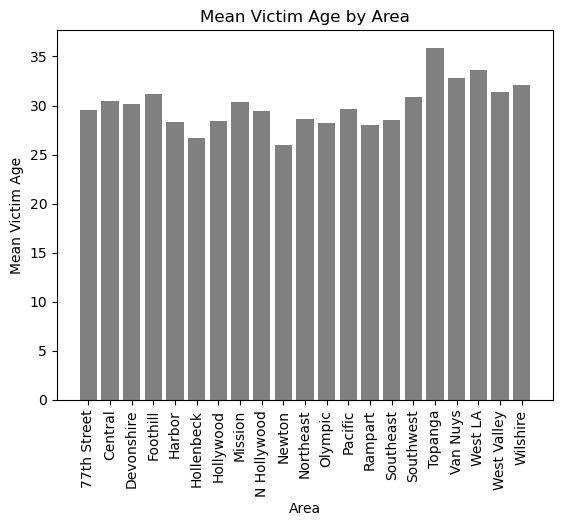

In [55]:
grouped = df.groupby('AREA NAME')['Vict Age'].mean()

plt.bar(grouped.index, grouped.values, color = 'grey')
plt.xticks(rotation=90)
plt.xlabel('Area')
plt.ylabel('Mean Victim Age')
plt.title('Mean Victim Age by Area')
plt.show()

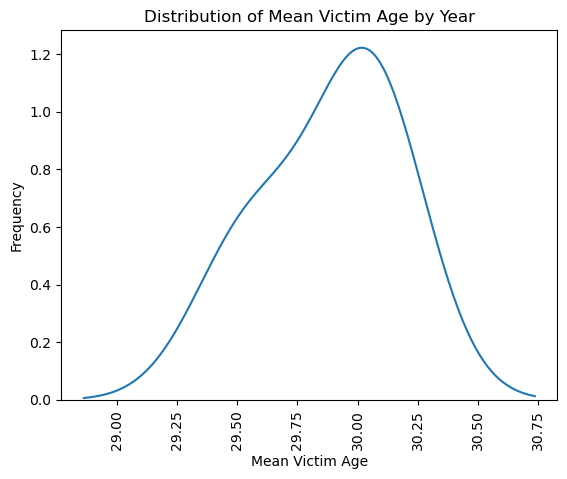

In [63]:
grouped = df.groupby('year')['Vict Age'].mean()

sns.kdeplot(grouped)
plt.xticks(rotation=90)
plt.xlabel('Mean Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Victim Age by Year')
plt.show()

In [74]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M')

In [76]:
time_bins = [0, 9*3600, 12*3600, 15*3600, 24*3600]
seconds_since_midnight = df['TIME OCC'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)
df['Time Interval'] = pd.cut(seconds_since_midnight, bins=time_bins, 
                             labels=['before 9:00', 'between 9:00-12:00', 'between 12:00-15:00', 'after 15:00'])

In [77]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Status,month,year,Time Interval
0,10304468,2020-08-01,1900-01-01 22:30:00,3,Southwest,377,624,0444 0913,36,F,B,400.0,AO,8,2020,after 15:00
1,190101086,2020-01-01,1900-01-01 03:30:00,1,Central,163,624,0416 1822 1414,25,M,H,500.0,IC,1,2020,before 9:00
2,191501505,2020-01-01,1900-01-01 17:30:00,15,N Hollywood,1543,745,0329 1402,76,F,W,500.0,IC,1,2020,after 15:00
3,191921269,2020-01-01,1900-01-01 04:15:00,19,Mission,1998,740,0329,31,X,X,500.0,IC,1,2020,before 9:00
4,200100501,2020-01-01,1900-01-01 00:30:00,1,Central,163,121,0413 1822 1262 1415,25,F,H,500.0,IC,1,2020,before 9:00


(200000.0, 500000.0)

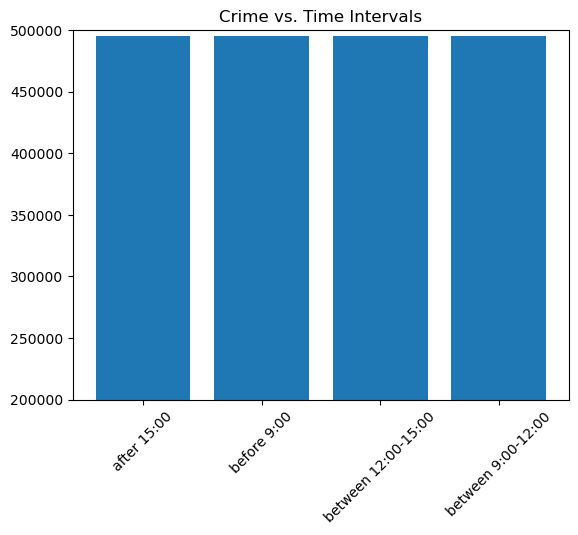

In [80]:
plt.bar(df['Time Interval'], df['Time Interval'].count())
plt.title('Crime vs. Time Intervals')
plt.xticks(rotation=45)
plt.ylim(200000, 500000)

In [119]:
import folium
import json

#Lets get show mean of victim ages in LA map

In [96]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

In [97]:
with open('2nrs-mtv8.json', 'r') as f:
    geojson_data = json.load(f)

In [100]:
geojson_data

[{'dr_no': '010304468',
  'date_rptd': '2020-01-08T00:00:00.000',
  'date_occ': '2020-01-08T00:00:00.000',
  'time_occ': '2230',
  'area': '03',
  'area_name': 'Southwest',
  'rpt_dist_no': '0377',
  'part_1_2': '2',
  'crm_cd': '624',
  'crm_cd_desc': 'BATTERY - SIMPLE ASSAULT',
  'mocodes': '0444 0913',
  'vict_age': '36',
  'vict_sex': 'F',
  'vict_descent': 'B',
  'premis_cd': '501',
  'premis_desc': 'SINGLE FAMILY DWELLING',
  'weapon_used_cd': '400',
  'weapon_desc': 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
  'status': 'AO',
  'status_desc': 'Adult Other',
  'crm_cd_1': '624',
  'location': '1100 W  39TH                         PL',
  'lat': '34.0141',
  'lon': '-118.2978'},
 {'dr_no': '190101086',
  'date_rptd': '2020-01-02T00:00:00.000',
  'date_occ': '2020-01-01T00:00:00.000',
  'time_occ': '0330',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0163',
  'part_1_2': '2',
  'crm_cd': '624',
  'crm_cd_desc': 'BATTERY - SIMPLE ASSAULT',
  'mocodes': '0416 182

In [98]:
grouped = df.groupby('AREA NAME')['Vict Age'].mean()

In [117]:
for feature in geojson_data:
    # Get the name of the area
    area_name = feature['area_name']
    
    # Get the mean victim age for the area
    try:
        mean_age = grouped[area_name]
    except KeyError:
        # Skip areas with missing data
        continue
    
    # Get the coordinates of the area's centroid
    latitude = float(feature['lat'])
    longitude = float(feature['lon'])
    
    # Create a marker for the area
    marker = folium.Marker(location=[latitude, longitude], 
                           popup=f'Mean victim age: {mean_age:.2f}')
    marker.add_to(m)

In [118]:
m

In [125]:
groups = df.groupby('AREA NAME')['Weapon Used Cd'].first()

In [126]:
groups.head()

AREA NAME
77th Street    500.0
Central        500.0
Devonshire     500.0
Foothill       500.0
Harbor         400.0
Name: Weapon Used Cd, dtype: float64

In [131]:
s = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

#Now, weapon used according to locations...

In [129]:
for feature in geojson_data:
    # Get the name of the area
    area_name = feature['area_name']
    
    # Get used weapon for the area
    try:
        weapon = groups[area_name]
    except KeyError:
        # Skip areas with missing data
        continue
    
    # Get the coordinates of the area's centroid
    latitude = float(feature['lat'])
    longitude = float(feature['lon'])
    
    # Create a marker for the area
    marker = folium.Marker(location=[latitude, longitude], 
                           popup=f'weapon used: {weapon:.3f}')
    marker.add_to(s)

In [130]:
s